The attached data file contains a sample of Lending Club loans and various attributes that define the make up and current status of the loans. 
We would like you to analyze the data in the attached file and come up with insights for couple of uses cases below.
 
1)      Lending Club offers loans to various borrower’s and some of the attributes related to borrower are present in the data file.
Can you analyze the loans and profile them based on borrower attributes?
 
2)      Lending Club loans are either ‘Fully Paid’ or’ Charged Off’ based on borrower payment history.
Can you analyze the loans in the file which are ‘Charged Off’ and draw insights based on both loan and borrower attributes?
 
What is Expected?
We would like to understand your analysis approach and the attributes you use while analyzing a data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

%matplotlib inline

In [2]:
loanDF = pd.read_csv('LoanData.csv')

In [349]:
loanDF.head(2)

,Loan Amount,Funded Amount,Loan Term,Interest Rate,Loan Grade,Loan SubGrade,Employee Title,Employemen Length,Annual Income,Verification Status,...,Loan Status,Loan Purpose,Title,Address State,Month since last Delinquency,Outstanding Principal,Total Payment,Total Recvd Principal,Total Recvd Interest,Total Recvd Late fees
0,2500,2500,60 months,15.27%,C,C4,Ryder,< 1 year,30000.0,Source Verified,...,Charged Off,car,bike,GA,NaN,0,1014.53,456.46,435.17,0.0
1,5600,5600,60 months,21.28%,F,F2,NaN,4 years,40000.0,Source Verified,...,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,NaN,0,647.50,162.02,294.94,0.0


In [5]:
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10027 entries, 0 to 10026
Data columns (total 21 columns):
Loan Amount                     10027 non-null int64
Funded Amount                   10027 non-null int64
Loan Term                       10027 non-null object
Interest Rate                   10027 non-null object
Loan Grade                      10027 non-null object
Loan SubGrade                   10027 non-null object
Employee Title                  9298 non-null object
Employemen Length               10027 non-null object
Annual Income                   10027 non-null float64
Verification Status             10027 non-null object
Loan Issued Date                10027 non-null object
Loan Status                     10027 non-null object
Loan Purpose                    10027 non-null object
Title                           10027 non-null object
Address State                   10027 non-null object
Month since last Delinquency    3302 non-null float64
Outstanding Principal        

In [65]:
loanDF.describe()

,Loan Amount,Funded Amount,Annual Income,Month since last Delinquency,Outstanding Principal,Total Payment,Total Recvd Principal,Total Recvd Interest,Total Recvd Late fees
count,10027.000000,10027.000000,1.002700e+04,3302.000000,10027.0,10027.000000,10027.000000,10027.000000,10027.000000
mean,12810.187494,12634.501845,6.808445e+04,37.324046,0.0,12746.584869,9662.374223,2817.242303,1.665958
std,8472.265454,8273.832939,4.865705e+04,21.421714,0.0,10608.584612,8158.253608,3284.119921,7.954185
min,1000.000000,1000.000000,6.000000e+03,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,6000.000000,6000.000000,4.080450e+04,19.000000,0.0,4940.450000,3300.000000,711.955000,0.000000
50%,11000.000000,11000.000000,5.900000e+04,35.000000,0.0,9720.494844,7250.000000,1574.800000,0.000000
75%,17400.000000,17000.000000,8.100000e+04,53.000000,0.0,17411.836095,14000.000000,3626.485000,0.000000
max,35000.000000,35000.000000,1.782000e+06,86.000000,0.0,58886.473430,35000.010000,23886.470000,180.200000


In [66]:
loanDF.columns

Index(['Loan Amount', 'Funded Amount', 'Loan Term', 'Interest Rate',
       'Loan Grade', 'Loan SubGrade', 'Employee Title', 'Employemen Length',
       'Annual Income', 'Verification Status', 'Loan Issued Date',
       'Loan Status', 'Loan Purpose', 'Title', 'Address State',
       'Month since last Delinquency', 'Outstanding Principal',
       'Total Payment', 'Total Recvd Principal', 'Total Recvd Interest',
       'Total Recvd Late fees'],
      dtype='object')

# Exploratory Data Analysis

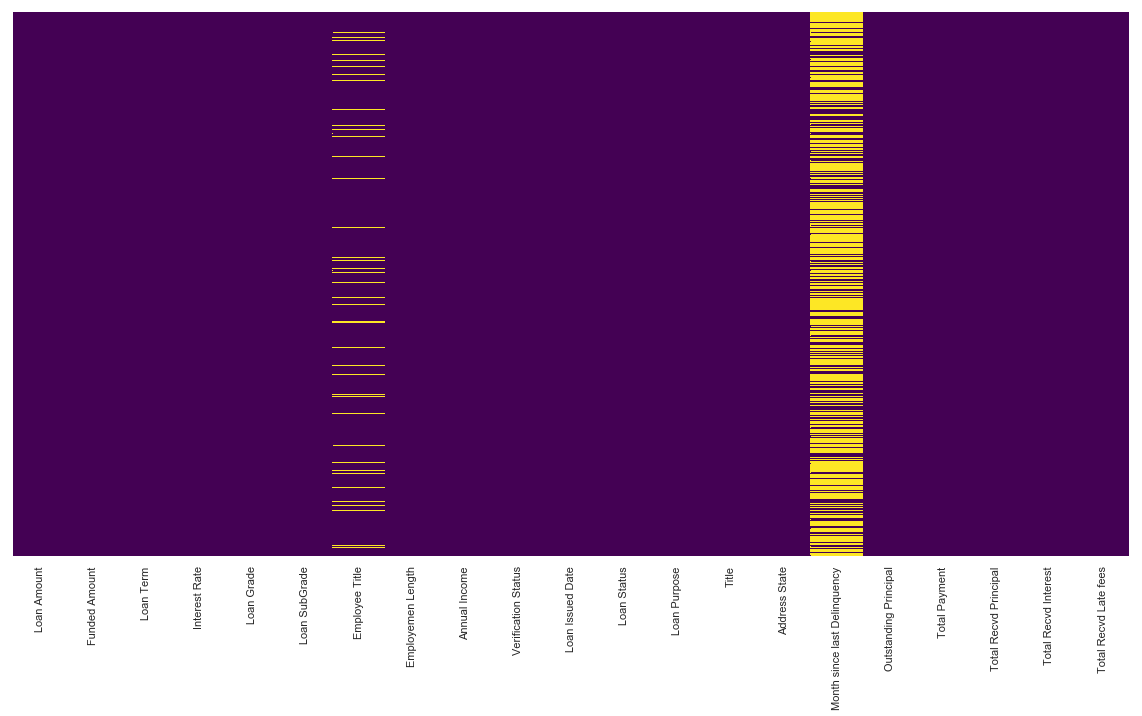

In [350]:
#Checking NaN values
sns.heatmap(loanDF.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [373]:
#Data CleanUp
loanDF.drop(['Funded Amount','Employee Title', 'Month since last Delinquency','Title'],axis=1,inplace=True)

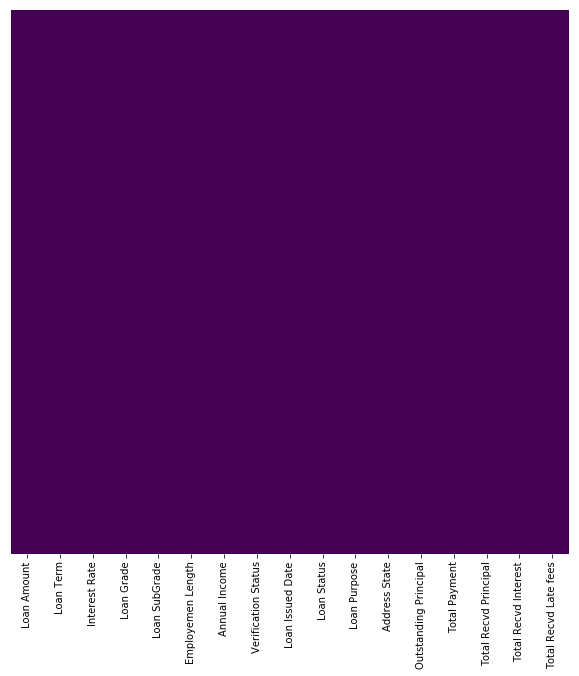

In [62]:
sns.heatmap(loanDF.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Borrower attributes:

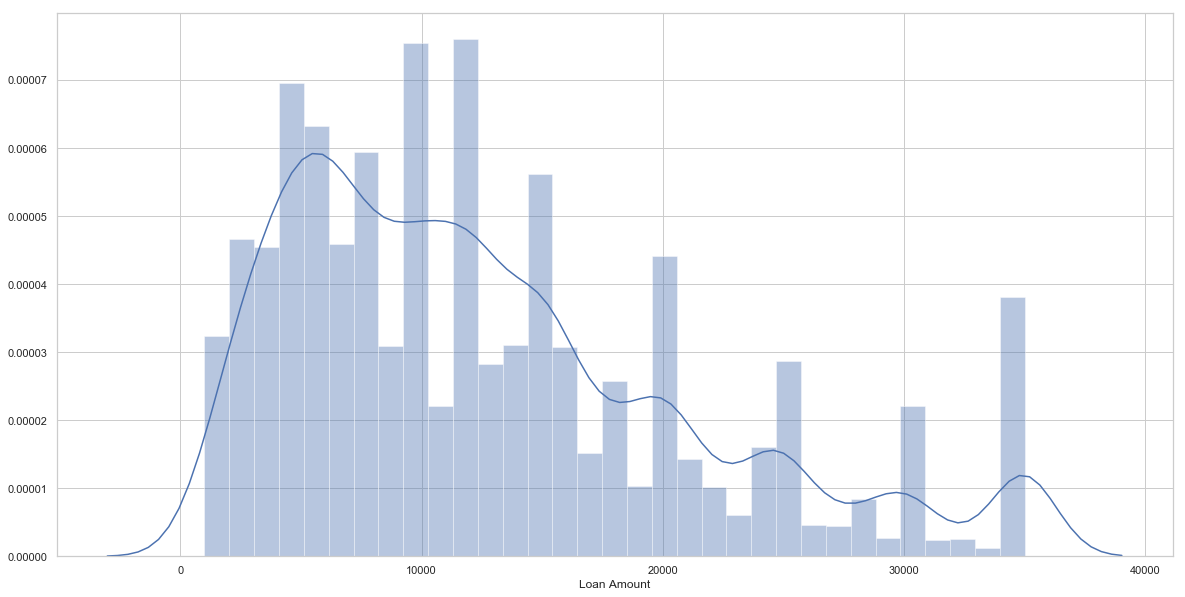

In [352]:
sns.distplot(loanDF['Loan Amount'])

In [353]:
loanDF['Loan Purpose'].unique()

array(['car', 'small_business', 'other', 'debt_consolidation',
       'major_purchase', 'credit_card', 'home_improvement', 'moving',
       'vacation', 'house', 'medical', 'wedding', 'renewable_energy'], dtype=object)

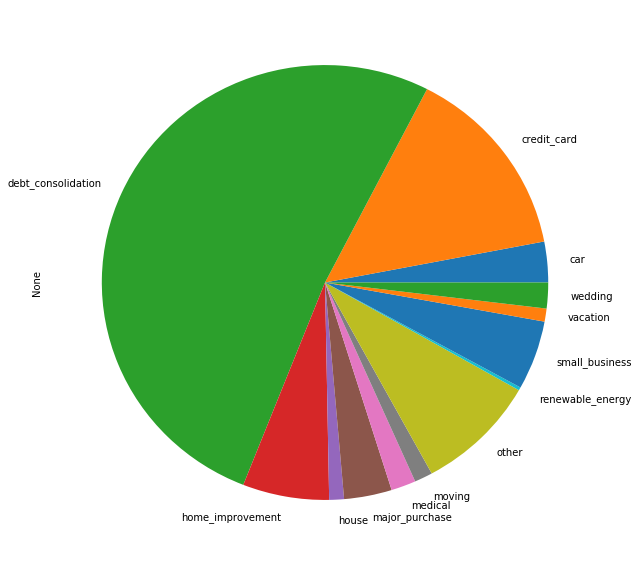

In [75]:
#Loan Purpose

plt.rcParams['figure.figsize'] = (10,10)
loanDF.groupby('Loan Purpose').size().plot(kind='pie')

In [87]:
#Annual Income

loanDF['Annual Income'].min()

6000.0

In [88]:
loanDF['Annual Income'].max()

1782000.0

In [380]:
#loanDF[(loanDF['Annual Income'] >= 0) & (loanDF['Annual Income'] < 25000)]['Loan Amount'].describe()
#loanDF[(loanDF['Annual Income'] >= 25000) & (loanDF['Annual Income'] < 50000)]['Loan Amount'].describe()
#loanDF[(loanDF['Annual Income'] >= 50000) & (loanDF['Annual Income'] < 75000)]['Loan Amount'].describe()
#loanDF[(loanDF['Annual Income'] >= 40000) & (loanDF['Annual Income'] < 50000)]['Loan Amount'].describe()
loanDF[(loanDF['Annual Income'] >= 90000) & (loanDF['Annual Income'] < 100000)]['Loan Amount'].describe()
#loanDF[(loanDF['Annual Income'] >= 100000) & (loanDF['Annual Income'] < 200000)]['Loan Amount'].describe()
#loanDF[loanDF['Annual Income'] > 100000]['Loan Amount'].describe()
#sns.distplot(loanDF['Annual Income'])
#plt.hist(loanDF['Annual Income'], bins=100)
#plt.plot(loanDF['Loan Amount'], loanDF['Annual Income'])

count      521.000000
mean     15804.798464
std       9329.740804
min       1000.000000
25%       8000.000000
50%      15000.000000
75%      22000.000000
max      35000.000000
Name: Loan Amount, dtype: float64

In [169]:
#sns.set_style('whitegrid')
#loanDF['Annual Income'].hist(bins=100)
#plt.xlabel('Annual Income')
?sns.jointplot

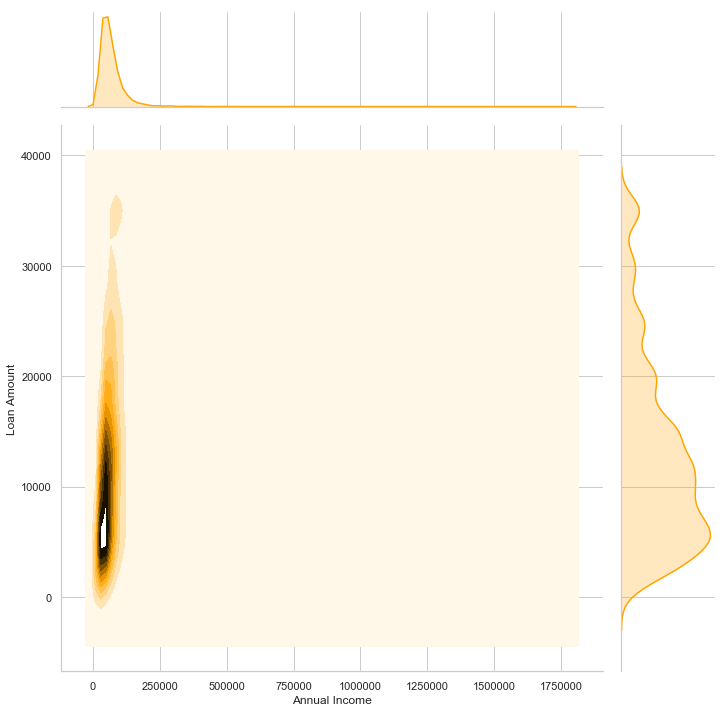

In [354]:
#sns.jointplot(x='Annual Income',y='Loan Amount',data=loanDF)
sns.jointplot(x='Annual Income',y='Loan Amount',data=loanDF,color='orange',kind='kde',height=10);

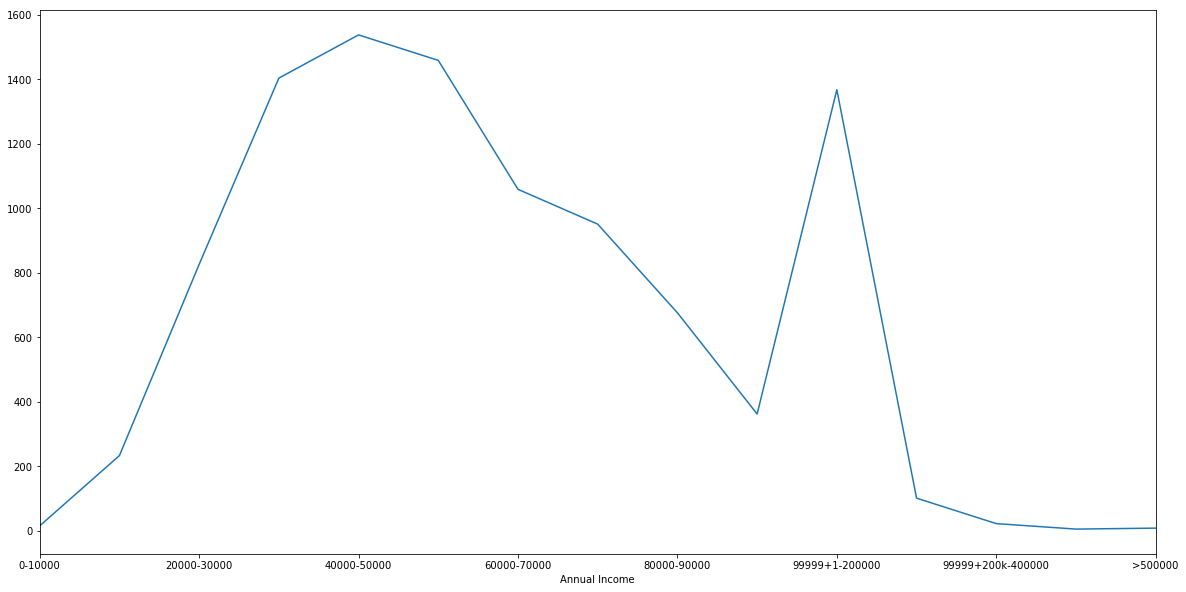

In [6]:
plt.rcParams['figure.figsize'] = (20,10)
#loanDF["Annual Income"].plot.density(logx = True)

def annualIncome(income):
    if income <= 10000:
        return '0-10000'
    elif income <= 20000:
        return '10000-20000'
    elif income <= 30000:
        return '20000-30000'
    elif income <= 40000:
        return '30000-40000'
    elif income <= 50000:
        return '40000-50000'
    elif income <= 60000:
        return '50000-60000'
    elif income <= 70000:
        return '60000-70000'
    elif income <= 80000:
        return '70000-80000'
    elif income <= 90000:
        return '80000-90000'
    elif income < 100000:
        return '90000-99999'
    elif income <= 200000:
        return '99999+1-200000'
    elif income <= 300000:
        return '99999+100k-300000'
    elif income <= 400000:
        return '99999+200k-400000'
    elif income <= 500000:
        return '99999+300k-500000'
    else:
        return '>500000' 
    
#fig, axs = plt.subplots(2,1,figsize=(20,30))
loanDF['Annual Income']=loanDF['Annual Income'].apply(annualIncome)
#loanDF.groupby('annualIncume').size().plot(ax=axs[0])
#loanDF.groupby('annualIncume').size()loanDF.plot(kind='pie',ax=axs[1])
loanDF.groupby('Annual Income').size().plot()
#loanDF.groupby('annualIncome').size().plot(kind='pie',ax=axs[1])

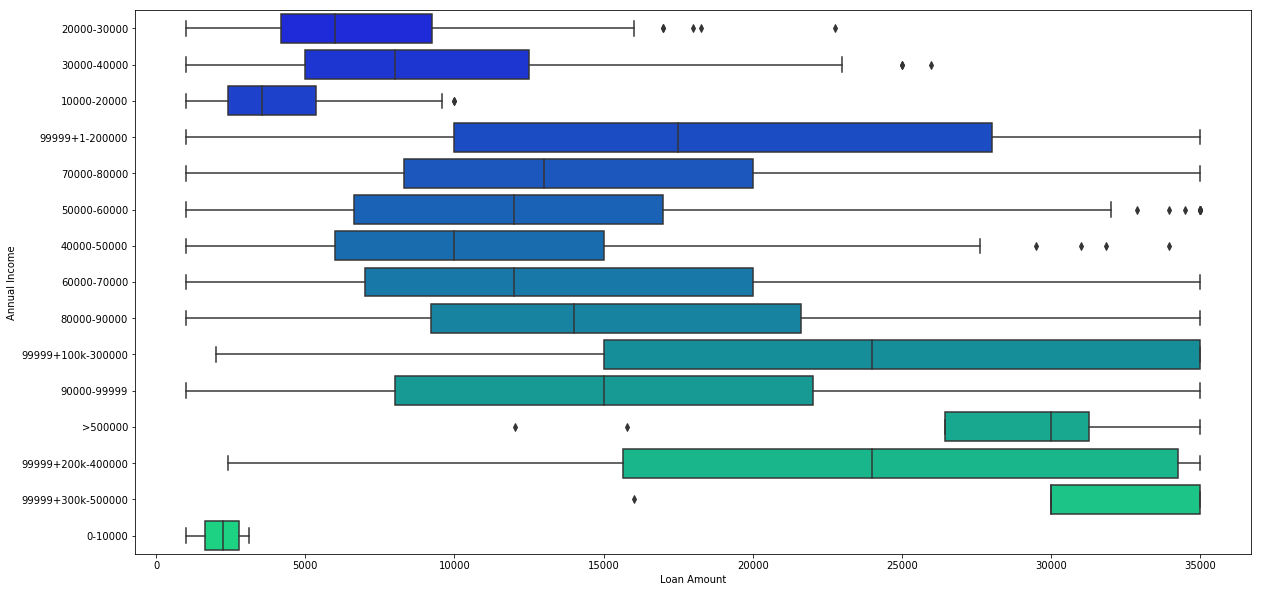

In [13]:
#loanDF['Annual Income'].head(2)
sns.boxplot(x='Loan Amount', y='Annual Income',data=loanDF,palette='winter')

In [86]:
loanDF['Employemen Length'].unique()

array(['< 1 year', '4 years', '3 years', '10+ years', '1 year', '9 years',
       '2 years', '8 years', '7 years', '5 years', 'n/a', '6 years'], dtype=object)

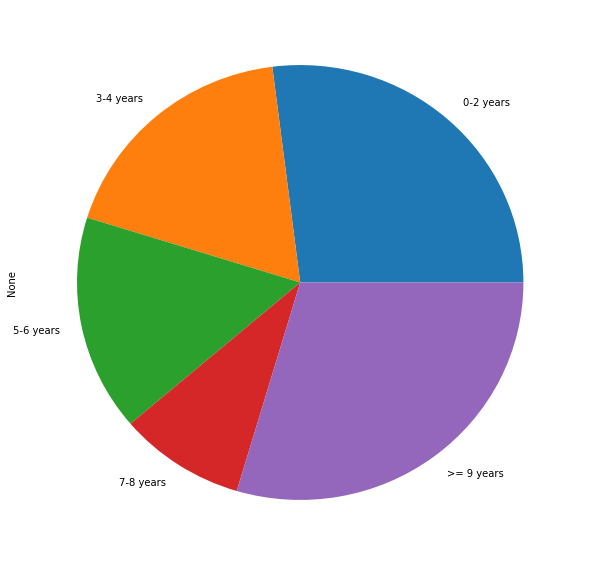

In [85]:
#Employement length to Loan
def employementLength(employment):
    if employment=='< 1 year' or employment=='1 year' or employment=='2 years':
        return '0-2 years'
    elif employment=='3 years' or employment=='4 years':
        return '3-4 years'
    elif employment=='5 years' or employment=='6 years':
        return '5-6 years'
    elif employment=='7 years' or employment=='8 years':
        return '7-8 years'
    elif employment=='9 years' or employment=='10+ years':
        return '>= 9 years'
    else:
        return None

plt.rcParams['figure.figsize'] = (10,10)
#loanDF.groupby('Employemen Length').size().plot(kind='pie')
loanDF['employementLength']=loanDF['Employemen Length'].apply(employementLength)
loanDF.groupby('employementLength').size().plot(kind='pie')

In [90]:
loanDF['Address State'].unique()

array(['GA', 'CA', 'TX', 'VA', 'FL', 'NY', 'PA', 'OH', 'IL', 'WA', 'MN',
       'AK', 'OR', 'AZ', 'WI', 'NC', 'CO', 'MO', 'WV', 'NV', 'SC', 'RI',
       'MA', 'KY', 'HI', 'NJ', 'MT', 'MI', 'SD', 'DC', 'OK', 'VT', 'NM',
       'MD', 'AL', 'KS', 'UT', 'LA', 'AR', 'CT', 'NH', 'DE', 'WY', 'MS',
       'TN'], dtype=object)

In [199]:
loanDF[loanDF['Address State'] == 'CA']['Loan Amount'].count()
#loanDF[loanDF['Address State'] == 'CA']['Loan Amount'].mean()

1837

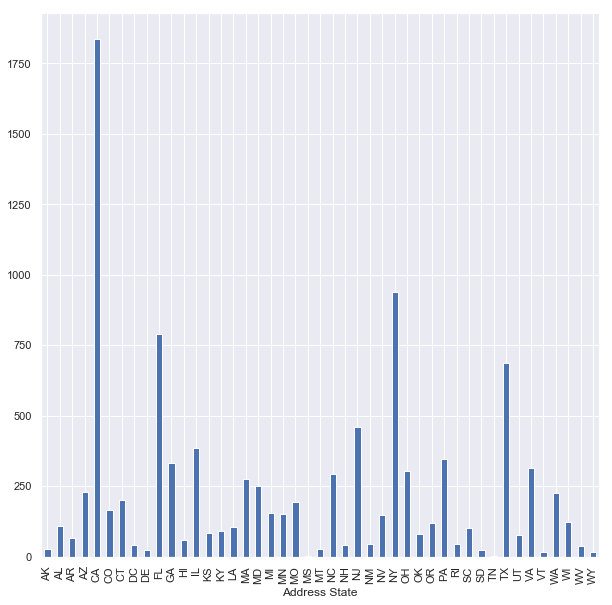

In [193]:
plt.rcParams['figure.figsize'] = (10,10)
loanDF.groupby('Address State').size().plot(kind='bar')

# Loan and Borrower Attributes:

In [242]:
# loanDF[loanDF['Loan Status'] == 'Charged Off'].count()
chargedOffDF = loanDF[loanDF['Loan Status'] == 'Charged Off']
fullyPaidDF = loanDF[loanDF['Loan Status'] == 'Fully Paid']
chargedOffDF.count()

Loan Amount              3524
Loan Term                3524
Interest Rate            3524
Loan Grade               3524
Loan SubGrade            3524
Employemen Length        3524
Annual Income            3524
Verification Status      3524
Loan Issued Date         3524
Loan Status              3524
Loan Purpose             3524
Address State            3524
Outstanding Principal    3524
Total Payment            3524
Total Recvd Principal    3524
Total Recvd Interest     3524
Total Recvd Late fees    3524
employementLength        3355
annualIncume             3524
dtype: int64

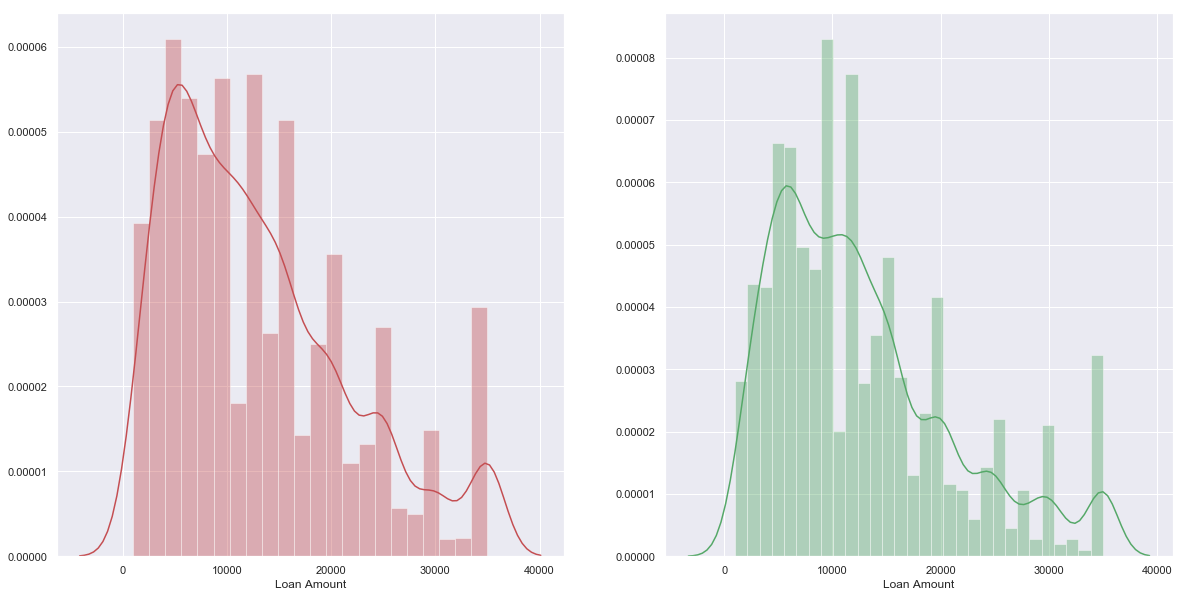

In [268]:
#Loan amount distribution for 'Charged Off' loans
fig, axs = plt.subplots(1,2,figsize=(20,10))
sns.distplot(chargedOffDF['Loan Amount'],ax=axs[0],color='r')
sns.distplot(fullyPaidDF['Loan Amount'],ax=axs[1],color='g')

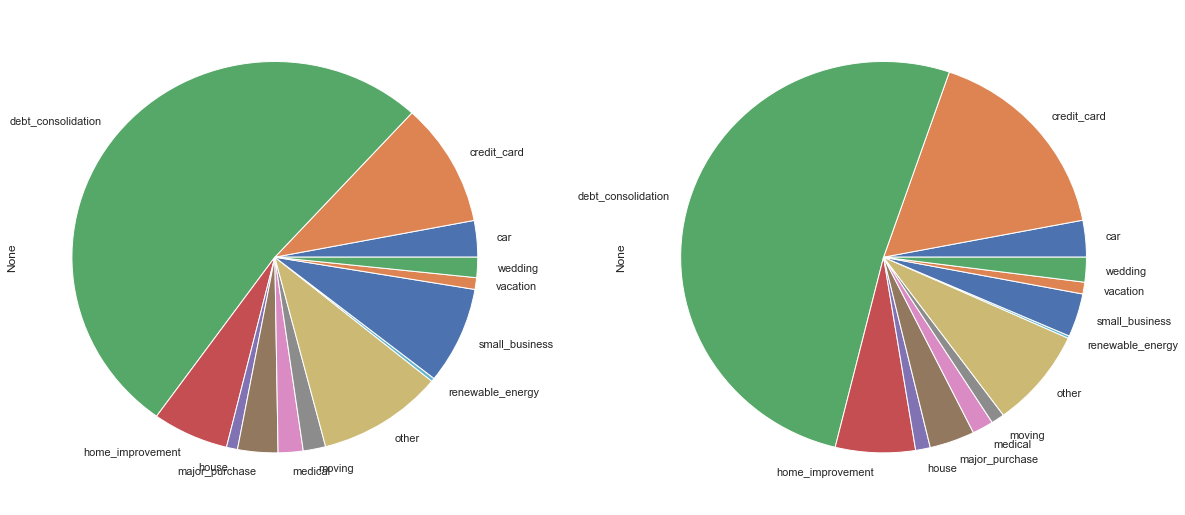

In [246]:
#Loan Purpose
fig, axs = plt.subplots(1,2,figsize=(20,9))
chargedOffDF.groupby('Loan Purpose').size().plot(kind='pie',ax=axs[0])
fullyPaidDF.groupby('Loan Purpose').size().plot(kind='pie',ax=axs[1])

In [211]:
#Annual Income:

chargedOffDF['Annual Income'].min()

8000.0

In [212]:
chargedOffDF['Annual Income'].max()

1250000.0

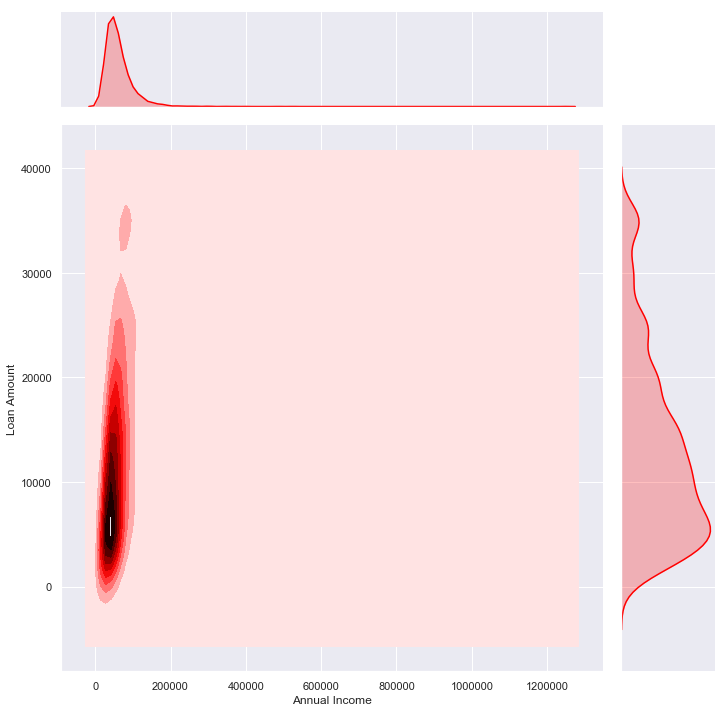

In [250]:
sns.jointplot(x='Annual Income',y='Loan Amount',data=chargedOffDF,color='red',kind='kde',height=10)

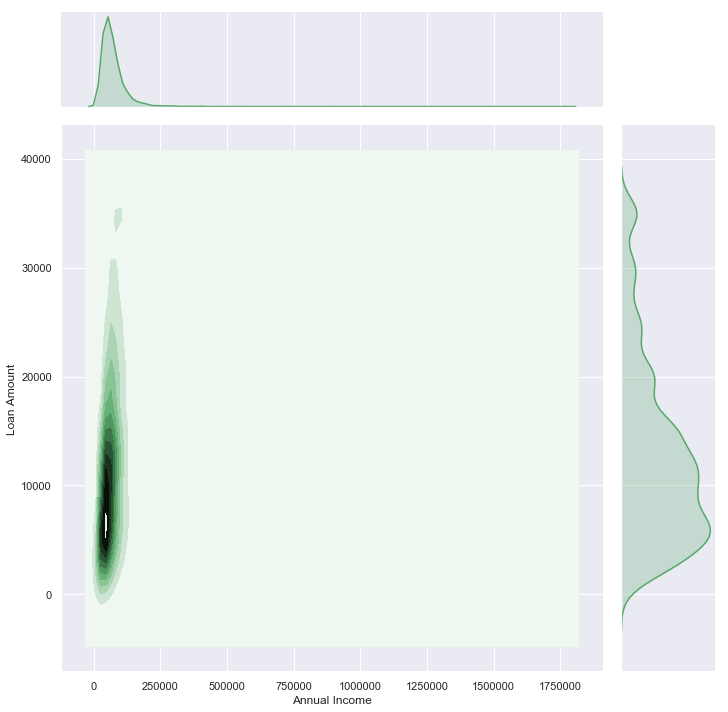

In [267]:
sns.jointplot(x='Annual Income',y='Loan Amount',data=fullyPaidDF,color='g',kind='kde',height=10);

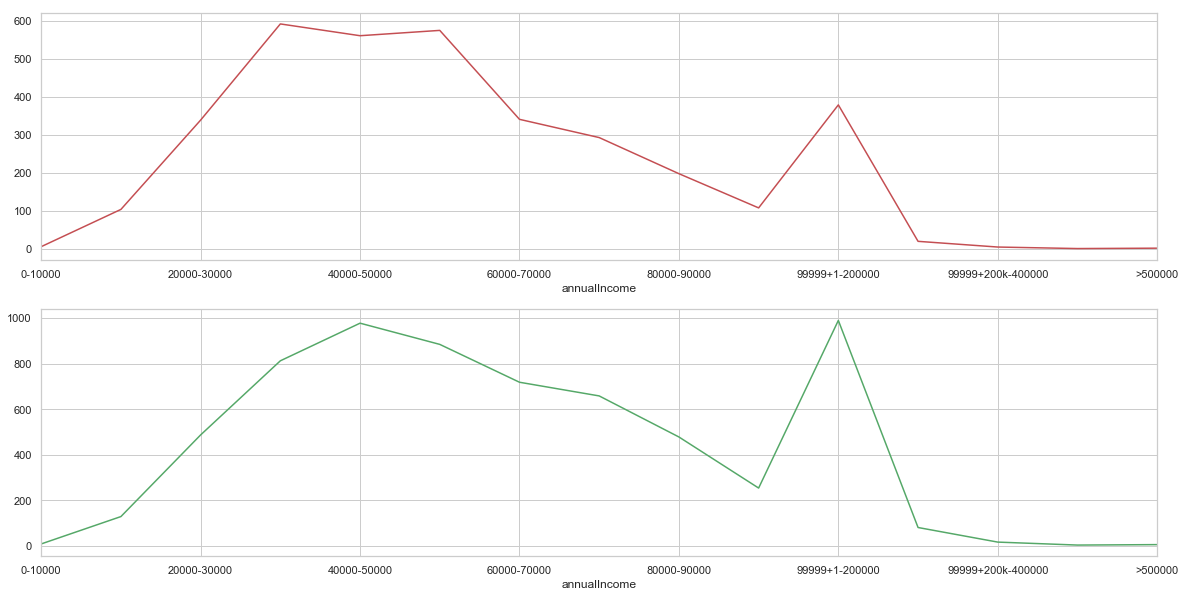

In [381]:
fig, axs = plt.subplots(2,1,figsize=(20,10))
chargedOffDF['annualIncome']=chargedOffDF['Annual Income'].apply(annualIncome)
chargedOffDF.groupby('annualIncome').size().plot(ax=axs[0],color='r')

fullyPaidDF['annualIncome']=fullyPaidDF['Annual Income'].apply(annualIncome)
fullyPaidDF.groupby('annualIncome').size().plot(ax=axs[1],color='g')

/anaconda/envs/apps/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda/envs/apps/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



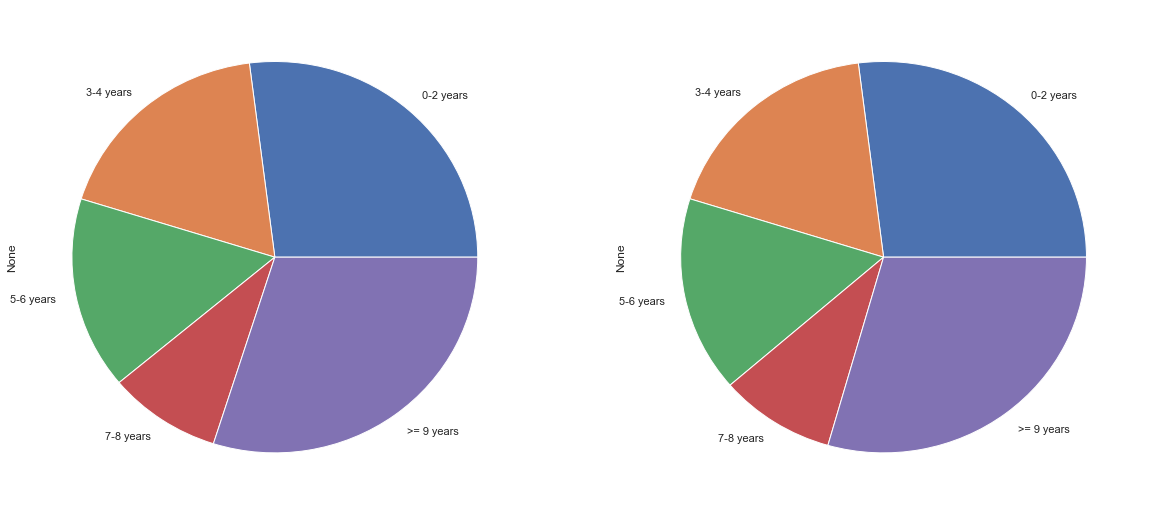

In [256]:
#Employemen Length:

#plt.rcParams['figure.figsize'] = (10,10)
#loanDF.groupby('Employemen Length').size().plot(kind='pie')
fig, axs = plt.subplots(1,2,figsize=(20,9))
chargedOffDF['employementLength']=chargedOffDF['Employemen Length'].apply(employementLength)
chargedOffDF.groupby('employementLength').size().plot(kind='pie',ax=axs[0])

fullyPaidDF['employementLength']=fullyPaidDF['Employemen Length'].apply(employementLength)
fullyPaidDF.groupby('employementLength').size().plot(kind='pie',ax=axs[1])

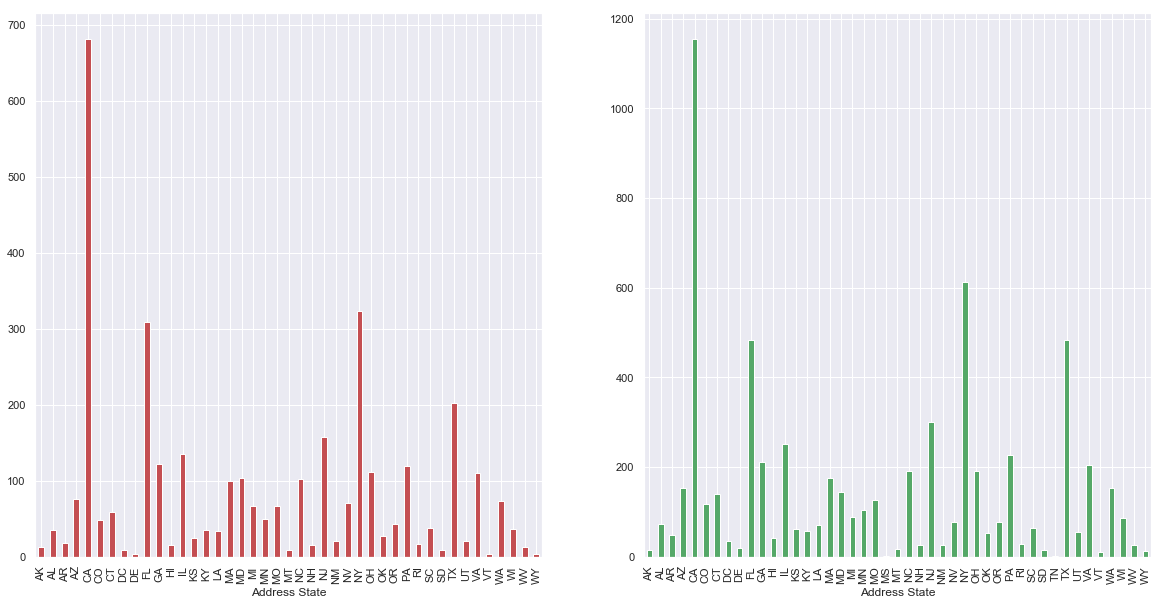

In [263]:
#Address State:

fig, axs = plt.subplots(1,2,figsize=(20,10))
#plt.rcParams['figure.figsize'] = (10,10)
chargedOffDF.groupby('Address State').size().plot(kind='bar',ax=axs[0],color='r')
fullyPaidDF.groupby('Address State').size().plot(kind='bar',ax=axs[1],color='g')

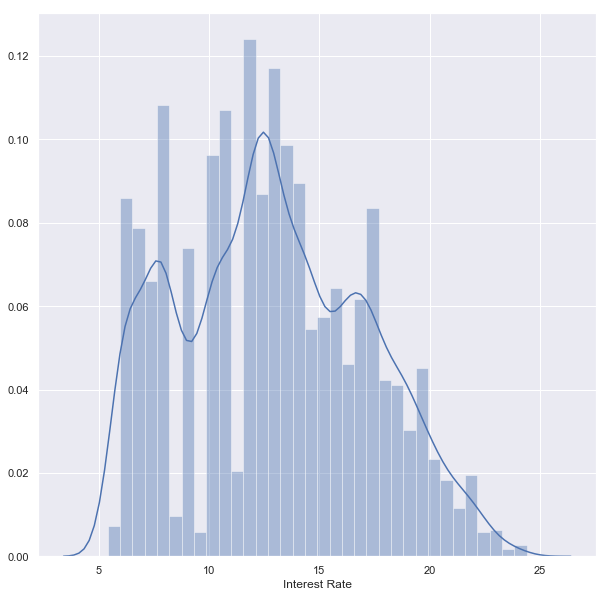

In [260]:
#Interest Rate:

sns.distplot(pd.to_numeric(loanDF['Interest Rate'].apply(lambda x:x.rstrip('%'))), color='b')

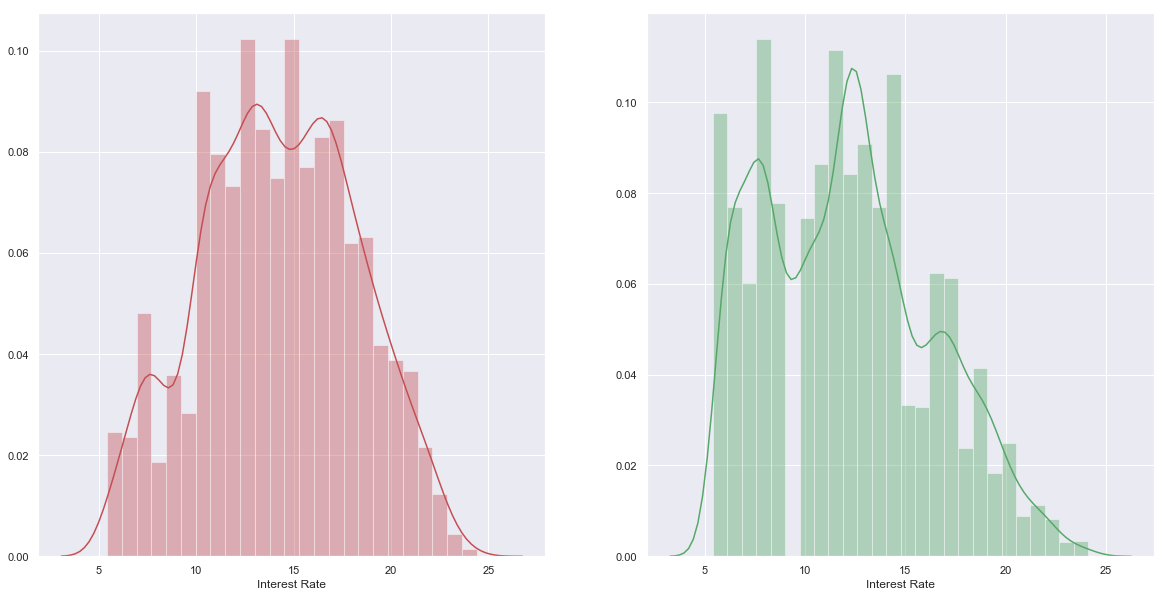

In [261]:
fig, axs = plt.subplots(1,2,figsize=(20,10))
sns.distplot(pd.to_numeric(chargedOffDF['Interest Rate'].apply(lambda x:x.rstrip('%'))), color="r",ax=axs[0])
sns.distplot(pd.to_numeric(fullyPaidDF['Interest Rate'].apply(lambda x:x.rstrip('%'))), color="g",ax=axs[1])

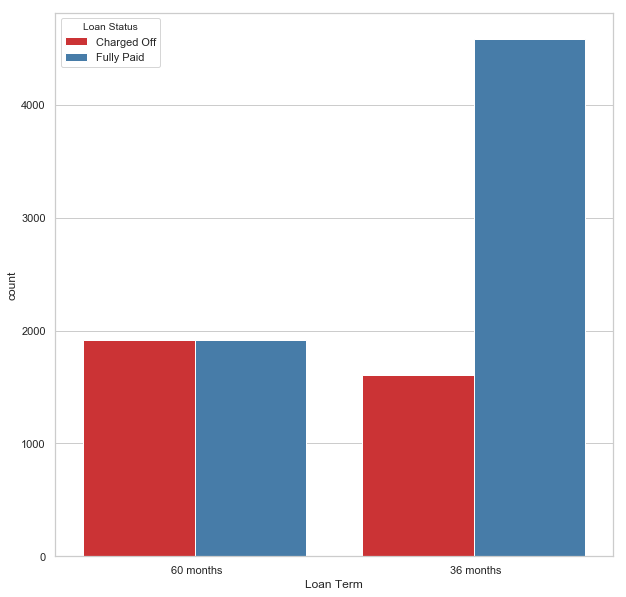

In [289]:
#Loan Terms:

sns.set_style('whitegrid')
sns.countplot(x='Loan Term',hue='Loan Status',data=loanDF,palette='Set1')

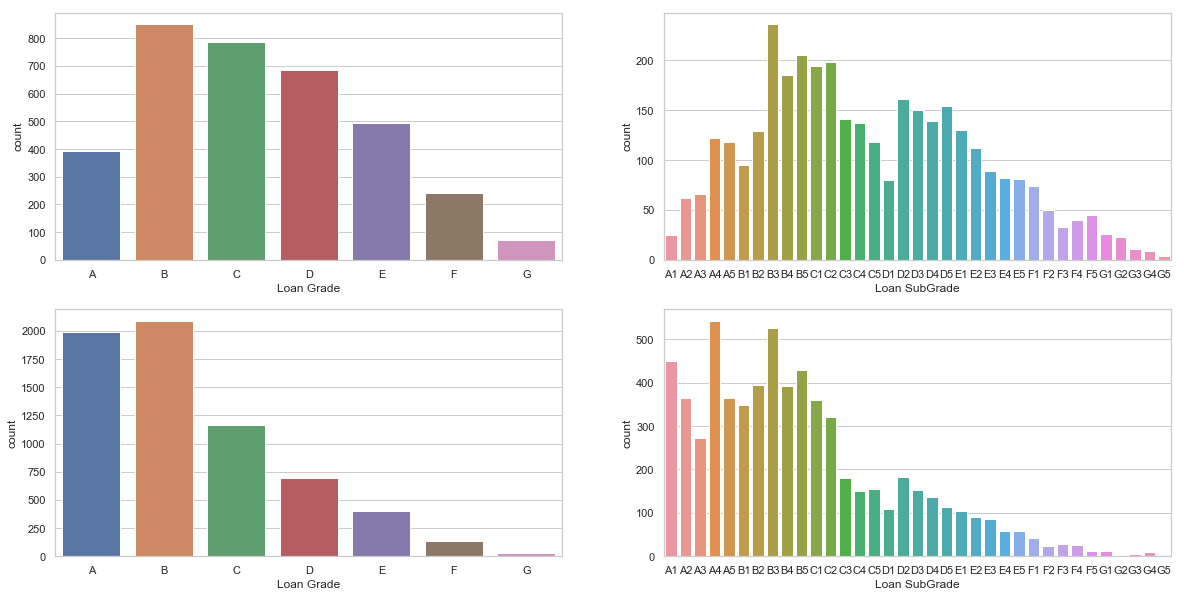

In [293]:
# Loan Grade and Loan SubGrade:

fig, axs = plt.subplots(2,2,figsize=(20,10))
sns.countplot(chargedOffDF['Loan Grade'], order = ('A','B','C','D','E','F','G'), ax=axs[0, 0])

l = []
for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    for j in ['1', '2', '3', '4', '5']:
        l.append(i+j)     
sns.countplot(chargedOffDF['Loan SubGrade'], order = l, ax=axs[0, 1])

sns.countplot(fullyPaidDF['Loan Grade'], order = ('A','B','C','D','E','F','G'), ax=axs[1, 0])

l = []
for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    for j in ['1', '2', '3', '4', '5']:
        l.append(i+j)     
sns.countplot(fullyPaidDF['Loan SubGrade'], order = l, ax=axs[1, 1])

In [335]:
df = pd.read_csv('LoanData.csv')
df.columns

Index(['Loan Amount', 'Funded Amount', 'Loan Term', 'Interest Rate',
       'Loan Grade', 'Loan SubGrade', 'Employee Title', 'Employemen Length',
       'Annual Income', 'Verification Status', 'Loan Issued Date',
       'Loan Status', 'Loan Purpose', 'Title', 'Address State',
       'Month since last Delinquency', 'Outstanding Principal',
       'Total Payment', 'Total Recvd Principal', 'Total Recvd Interest',
       'Total Recvd Late fees'],
      dtype='object')

**The analysis on all the borrower and loan attributes on this dataset clearly points out that the "Loan-Duration (Loan Term)" is the biggest predictor of defaults. So on longer term loans, Lending club should do stricter background check on the borrowers.

# Machine Learning Model

In [336]:
df = pd.read_csv('LoanData.csv')

df=df.drop(['Funded Amount', 'Loan SubGrade', 'Employee Title', 'Loan Issued Date','Title', 
            'Address State','Month since last Delinquency', 'Outstanding Principal','Total Payment', 
            'Total Recvd Principal', 'Total Recvd Interest','Total Recvd Late fees'],axis=1)

df=df.dropna(thresh=len(df)/2,axis=1)
df=df.dropna()

def binaryClass(text):
    if text=='Fully Paid':
        return 0
    else:
        return 1  
df['Loan Status']=df['Loan Status'].apply(binaryClass)

def purposeClass(text):
    if text=='debt_consolidation' or text=='credit_card':
        return 'refinance'
    elif text=='house' or text=='home_improvement' or text=='renewable_energy' or text=='moving':
        return 'home'
    elif text=='car' or text=='major_purchase':
        return 'major_purchase'
    else:
        return 'other'
df['Loan Purpose']=df['Loan Purpose'].apply(purposeClass)

df['Interest Rate'] = pd.to_numeric(df['Interest Rate'].apply(lambda x:x.rstrip('%')))

dummy_df=pd.get_dummies(df[['Verification Status','Loan Purpose','Loan Term']])
df=df.drop(['Verification Status','Loan Purpose','Loan Term'],axis=1)
df=pd.concat([df,dummy_df],axis=1)

mappingDict={
    'Employemen Length':{
        '10+ years':10,
        '9 years':9,
        '8 years':8,
        '7 years':7,
        '6 years':6,
        '5 years':5,
        '4 years':4,
        '3 years':3,
        '2 years':2,
        '1 year':1,
        '< 1 year':0,
        'n/a':0
    },
    'Loan Grade':{
        'A':1,
        'B':2,
        'C':3,
        'D':4,
        'E':5,
        'F':6,
        'G':7,
    }
}
df=df.replace(mappingDict)

cols = list(df)
cols.insert(0, cols.pop(cols.index('Loan Status')))
df = df.ix[:, cols]
df.head()
# 'Loan Status','Loan Amount', 'Interest Rate', 'Employemen Length', 'Loan Grade', 'Annual Income',
#'Verification Status', 'Loan Term', 'Loan Purpose',


/anaconda/envs/apps/lib/python3.6/site-packages/ipykernel_launcher.py:63: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,Loan Status,Loan Amount,Interest Rate,Loan Grade,Employemen Length,Annual Income,Verification Status_Not Verified,Verification Status_Source Verified,Verification Status_Verified,Loan Purpose_home,Loan Purpose_major_purchase,Loan Purpose_other,Loan Purpose_refinance,Loan Term_ 36 months,Loan Term_ 60 months
0,1,2500,15.27,3,0,30000.0,0,1,0,0,1,0,0,0,1
1,1,5600,21.28,6,4,40000.0,0,1,0,0,0,1,0,0,1
2,1,5375,12.69,2,0,15000.0,0,0,1,0,0,1,0,0,1
3,1,9000,13.49,3,0,30000.0,0,1,0,0,0,0,1,1,0
4,1,10000,10.65,2,3,100000.0,0,1,0,0,0,1,0,1,0


In [308]:
df['Loan Status'].unique()

array([1, 0])

In [337]:
from sklearn.model_selection import train_test_split

X = df[['Loan Amount', 'Interest Rate', 'Loan Grade','Employemen Length', 'Annual Income',
             'Verification Status_Not Verified','Verification Status_Source Verified','Verification Status_Verified',
             'Loan Purpose_home','Loan Purpose_major_purchase','Loan Purpose_other','Loan Purpose_refinance',
             'Loan Purpose_refinance','Loan Term_ 36 months','Loan Term_ 60 months']]
y = df['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [340]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [341]:
predictions = logmodel.predict(X_test)

In [342]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.88      0.76      2118
          1       0.52      0.23      0.32      1191

avg / total       0.62      0.65      0.60      3309

[[1866  252]
 [ 920  271]]


**The average acuracy of the simple model above is 62% as can be seen in the precision column!
